                        Markets funding_total_usd              
                          count              mean           sum
Markets                                                        
 Accounting                  16      1.946598e+07  3.114556e+08
 Ad Targeting                13      1.379458e+07  1.793296e+08
 Adventure Travel             5      2.962864e+05  1.481432e+06
 Advertising                917      1.380661e+07  1.266066e+10
 Advertising Exchanges        2      3.871001e+07  7.742002e+07
...                         ...               ...           ...
Enterprise 2.0                1      1.129810e+07  1.129810e+07
K-12 Education               14      4.252788e+06  5.953903e+07
M2M                           7      7.575403e+06  5.302782e+07
P2P Money Transfer            9      7.392765e+07  6.653489e+08
Windows Phone 7               4      4.815244e+06  1.926098e+07

[736 rows x 3 columns]


<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 432x288 with 0 Axes>

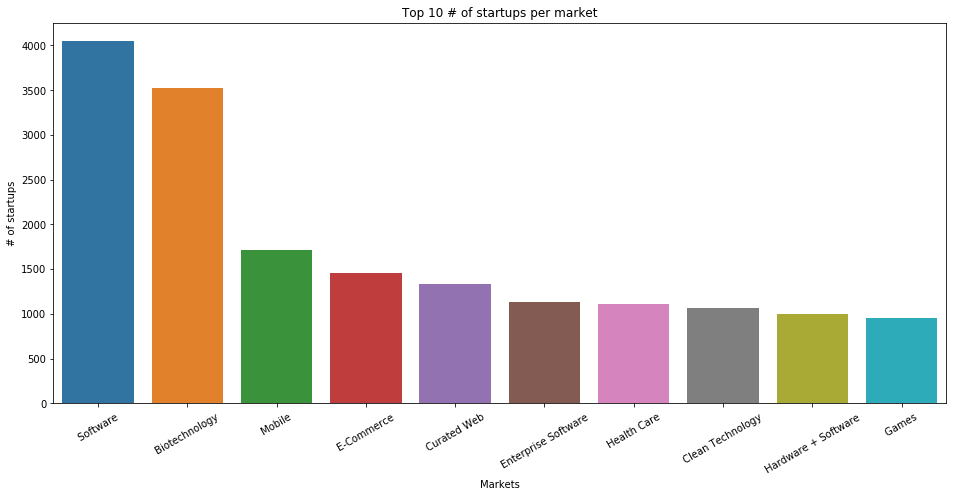

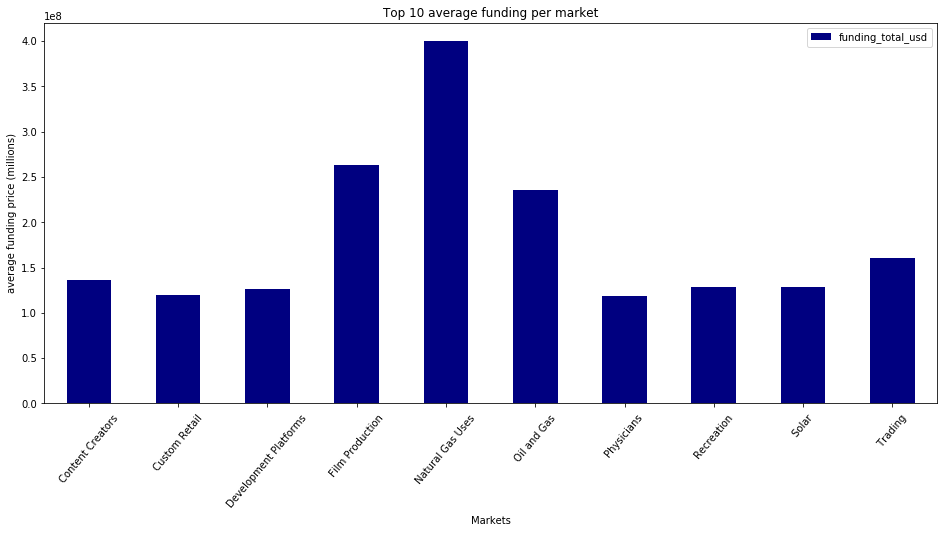

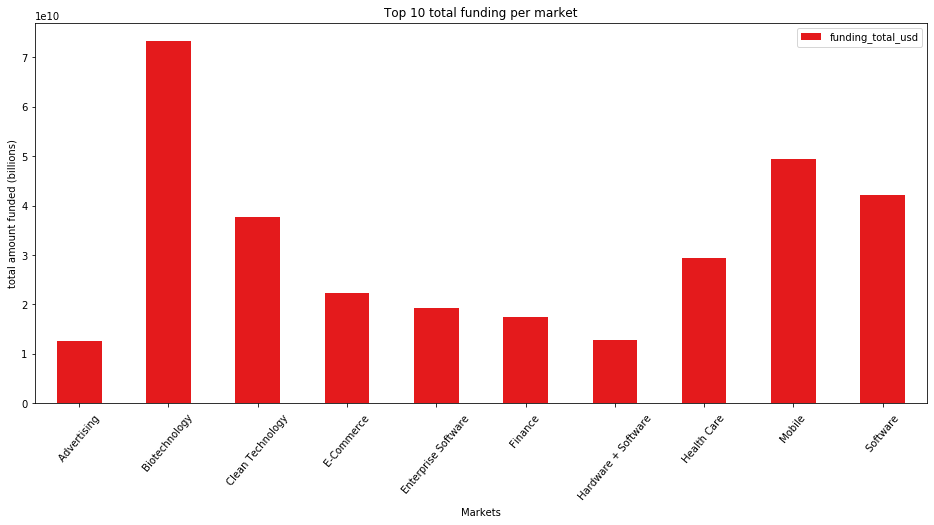

In [86]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
#pd.set_option('display.max_rows', None) 
df = pd.read_csv('investments.csv')
df = df.rename(columns={" funding_total_usd ": "funding_total_usd", ' market ': 'Markets'})
df['funding_total_usd'] = df['funding_total_usd'].str.replace(',', '')
df['funding_total_usd'] = df['funding_total_usd'].str.replace('-', '')
df['funding_total_usd'] = df['funding_total_usd'].str.replace(' ', '')
df['funding_total_usd'] = pd.to_numeric(df['funding_total_usd'], errors='coerce')
new_df = df[['Markets', 'funding_total_usd']]
aggregations = {'Markets':['count'], 'funding_total_usd':['mean', sum]}
mean_agg = {'funding_total_usd':'mean'}
sum_agg = {'funding_total_usd':sum}
new_df = new_df.dropna(axis= 'index', how = 'any')
print(new_df.groupby(['Markets']).agg(aggregations))
mean_df = new_df.groupby(['Markets']).agg(mean_agg)
mean_df = mean_df.nlargest(10, mean_agg)
sum_df = new_df.groupby(['Markets']).agg(sum_agg)
sum_df = sum_df.nlargest(10, sum_agg)

plt.figure(1)
plt.figure(figsize=(16,7))
sns.countplot(x ='Markets', data = new_df, order=new_df['Markets'].value_counts().iloc[:10].index)
plt.xticks(rotation=30)
plt.xlabel("Markets")
plt.ylabel("# of startups")
plt.title('Top 10 # of startups per market')

plt.figure(2)
mean_df.groupby('Markets').agg(mean_agg).plot(kind = 'bar', figsize = (16,7), colormap = 'jet')
plt.xlabel("Markets")
plt.ylabel("average funding price (millions)")
plt.title('Top 10 average funding per market')
plt.xticks(rotation=50)


plt.figure(3)
sum_df.groupby('Markets').agg(sum_agg).plot(kind = 'bar', figsize = (16,7), colormap = 'Set1')
plt.xlabel("Markets")
plt.ylabel("total amount funded (billions)")
plt.title('Top 10 total funding per market')
plt.xticks(rotation=50)

plt.show